In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
df = pd.read_csv("netflix_datasets.csv")

In [3]:
# Display first few records
print("First 15 records:")
print(df.head(10))

First 15 records:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show                     Blood & Water              NaN   
2      s3  TV Show                         Ganglands  Julien Leclercq   
3      s4  TV Show             Jailbirds New Orleans              NaN   
4      s5  TV Show                      Kota Factory              NaN   
5      s6  TV Show                     Midnight Mass    Mike Flanagan   
6      s7    Movie  My Little Pony: A New Generation    Robert Cullen   
7      s8    Movie                           Sankofa     Haile Gerima   
8      s9  TV Show     The Great British Baking Show  Andy Devonshire   
9     s10    Movie                      The Starling   Theodore Melfi   

          country          date_added  release_year rating   duration  \
0   United States  September 25, 2021          2020  PG-13     90 min   
1    South Africa  September 24,

In [4]:
# Dataset information
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       299 non-null    object
 1   type          299 non-null    object
 2   title         299 non-null    object
 3   director      204 non-null    object
 4   country       201 non-null    object
 5   date_added    299 non-null    object
 6   release_year  299 non-null    int64 
 7   rating        299 non-null    object
 8   duration      299 non-null    object
 9   listed_in     299 non-null    object
dtypes: int64(1), object(9)
memory usage: 23.5+ KB
None


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
show_id          0
type             0
title            0
director        95
country         98
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
dtype: int64


In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

In [8]:
# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [9]:
# Separate Movies and TV Shows
movies_df = df[df['type'] == 'Movie'].copy()
tvshows_df = df[df['type'] == 'TV Show'].copy()

In [10]:
# Filling missing values in the selected column
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
print(df.head(15))

   show_id     type                                title             director  \
0       s1    Movie                 Dick Johnson Is Dead      Kirsten Johnson   
1       s2  TV Show                        Blood & Water              Unknown   
2       s3  TV Show                            Ganglands      Julien Leclercq   
3       s4  TV Show                Jailbirds New Orleans              Unknown   
4       s5  TV Show                         Kota Factory              Unknown   
5       s6  TV Show                        Midnight Mass        Mike Flanagan   
6       s7    Movie     My Little Pony: A New Generation        Robert Cullen   
7       s8    Movie                              Sankofa         Haile Gerima   
8       s9  TV Show        The Great British Baking Show      Andy Devonshire   
9      s10    Movie                         The Starling       Theodore Melfi   
10     s11  TV Show  Vendetta: Truth, Lies and The Mafia              Unknown   
11     s12  TV Show         

In [12]:
#Top 10 Directors on Netflix
top_directors = df['director'].value_counts().drop('Unknown', errors='ignore').head(15)
print("\nTop 15 Directors:")
print(top_directors)


Top 15 Directors:
director
Toshiya Shinohara           4
Rathindran R Prasad         4
Masahiko Murata             3
Jane Campion                3
Milan Luthria               3
Delhiprasad Deenadayalan    2
Kemi Adetiba                2
Apoorva Lakhia              2
Sachin Yardi                2
Chapman Way, Maclain Way    2
Antoine Fuqua               2
Hajime Kamegaki             2
Mani Ratnam                 2
Reginald Hudlin             2
Wolfgang Petersen           2
Name: count, dtype: int64


In [13]:
# Year-on-year growth of content
print("\nContent Growth by Year:")
print(df['year_added'].value_counts().sort_index())


Content Growth by Year:
year_added
2019     49
2020      9
2021    241
Name: count, dtype: int64


In [14]:
# Summary of Dataset
print("\n✅ Dataset Summary:")
print(f"- Total Titles: {df.shape[0]}")
print(f"- Movies: {movies_df.shape[0]}")
print(f"- TV Shows: {tvshows_df.shape[0]}")


✅ Dataset Summary:
- Total Titles: 299
- Movies: 188
- TV Shows: 111


In [15]:
# Set up plot style
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Exploratory Data Analysis 

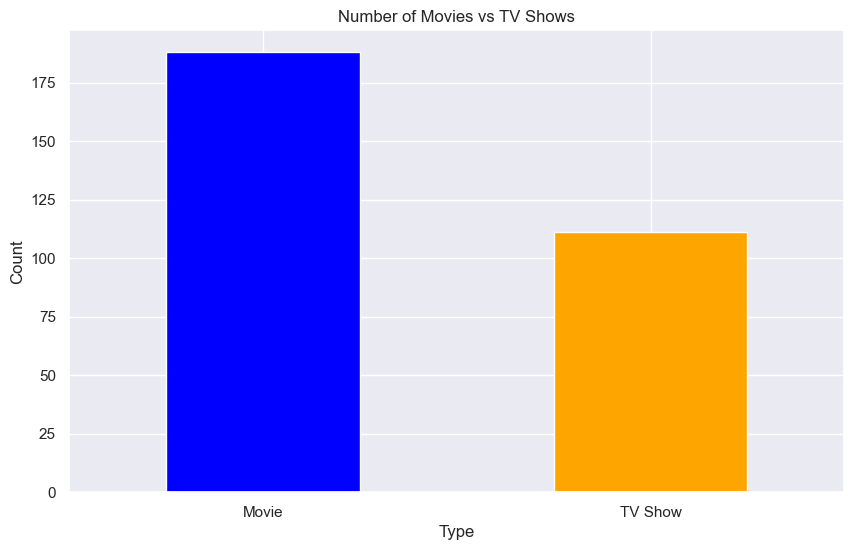

In [16]:
# Movie vs TV Show count
df['type'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Number of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

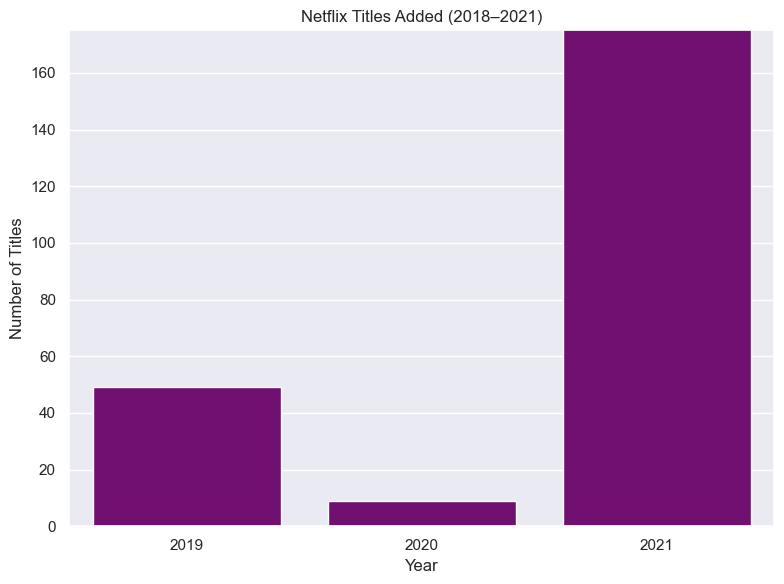

In [17]:
# Extract the year from 'date_added'
df['year_added'] = df['date_added'].dt.year
# Filter for years 2018 to 2021
filtered_df = df[df['year_added'].isin([2018, 2019, 2020, 2021])]
# Count titles added each year
yearly_counts = filtered_df['year_added'].value_counts().sort_index()
# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=yearly_counts.index.astype(str), y=yearly_counts.values, color='purple')
plt.title("Netflix Titles Added (2018–2021)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.ylim(0, 175)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

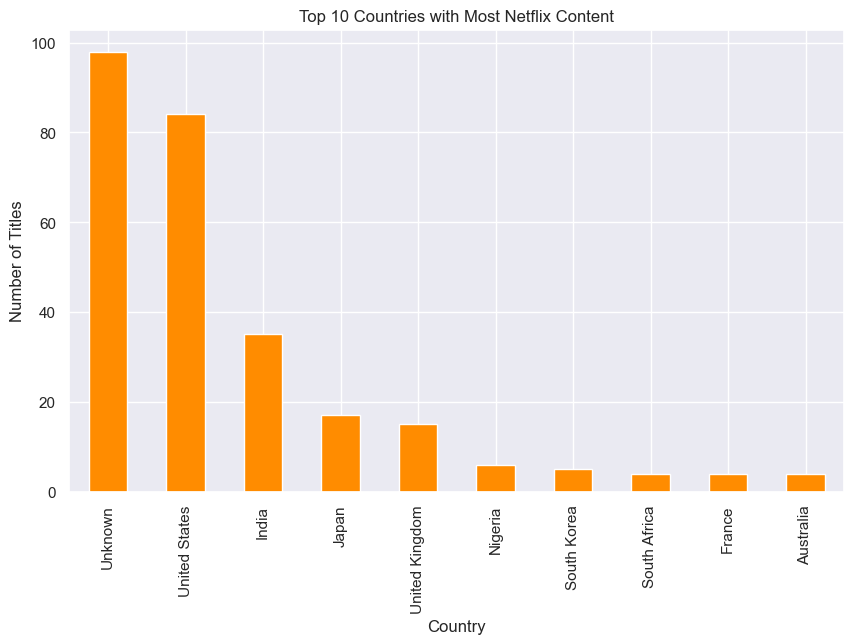

In [18]:
# Top 10 countries with most content
df['country'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar', color='darkorange')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

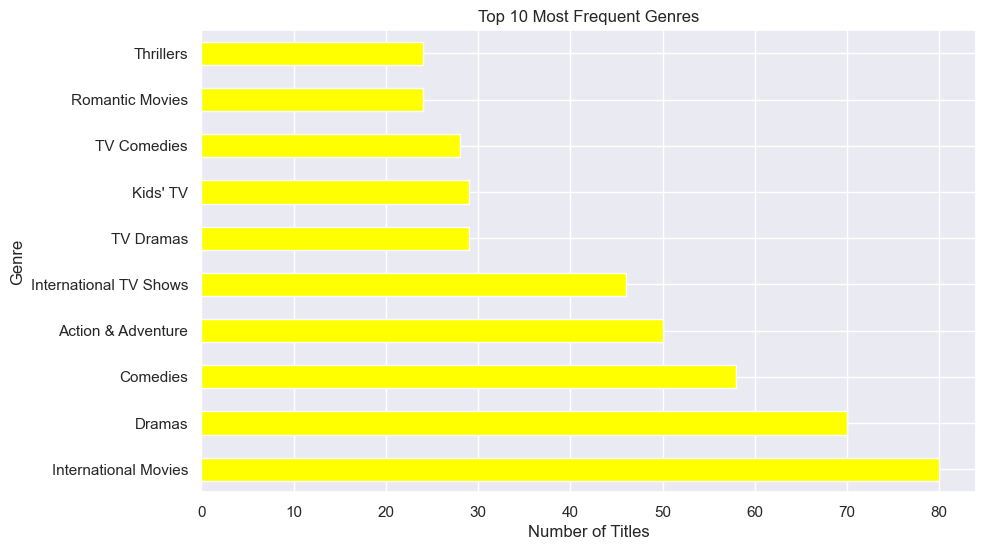

In [19]:
# Top 10 genres/categories
df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='barh', color='yellow')
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

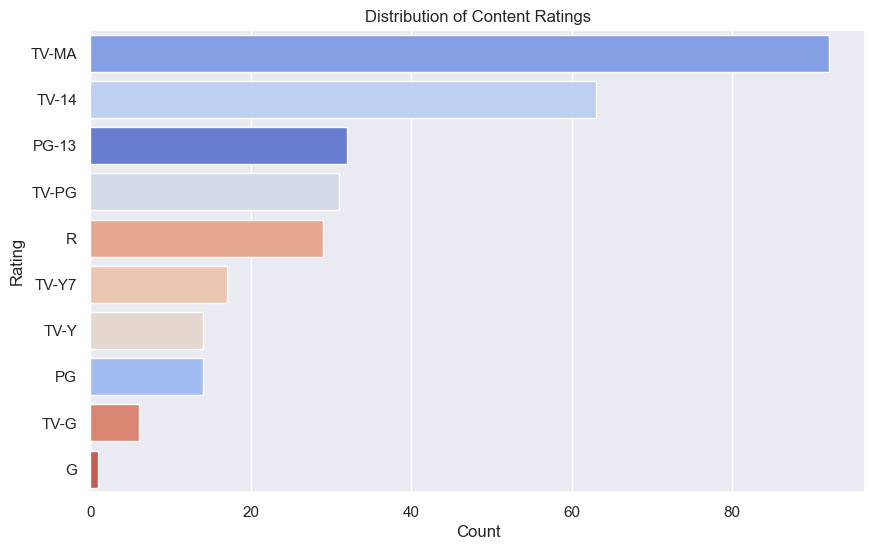

In [20]:
# Rating distribution (future-proofed)
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, hue='rating', palette='coolwarm', legend=False)
plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

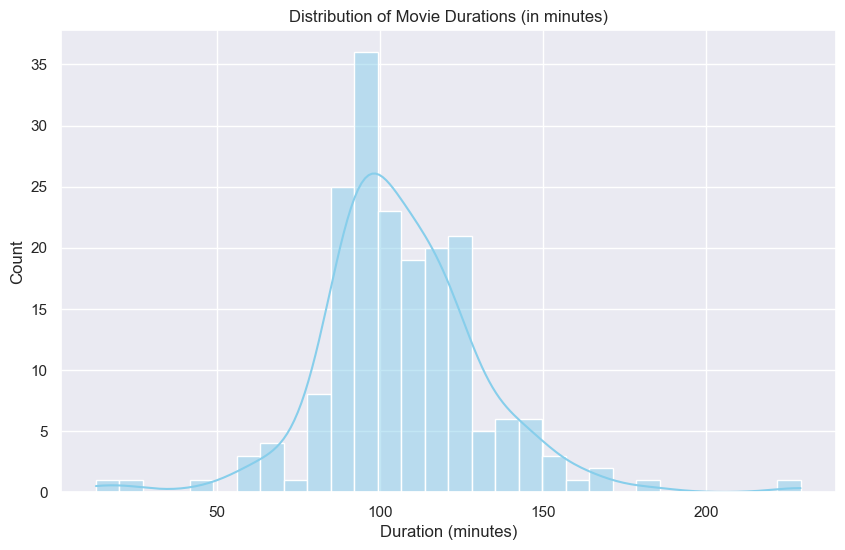

In [21]:
# Movie duration analysis
movies_df['duration_num'] = movies_df['duration'].str.extract('(\d+)').astype(float)
sns.histplot(movies_df['duration_num'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Movie Durations (in minutes)")
plt.xlabel("Duration (minutes)")
plt.show()

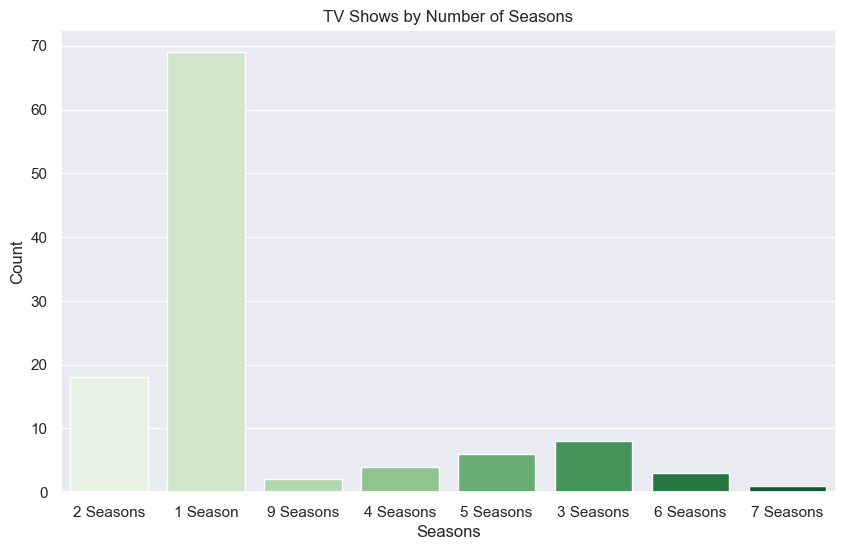

In [23]:
# TV Show season count
sns.countplot(x='duration', hue='duration', data=tvshows_df, palette='Greens', legend=False)
plt.title("TV Shows by Number of Seasons")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()

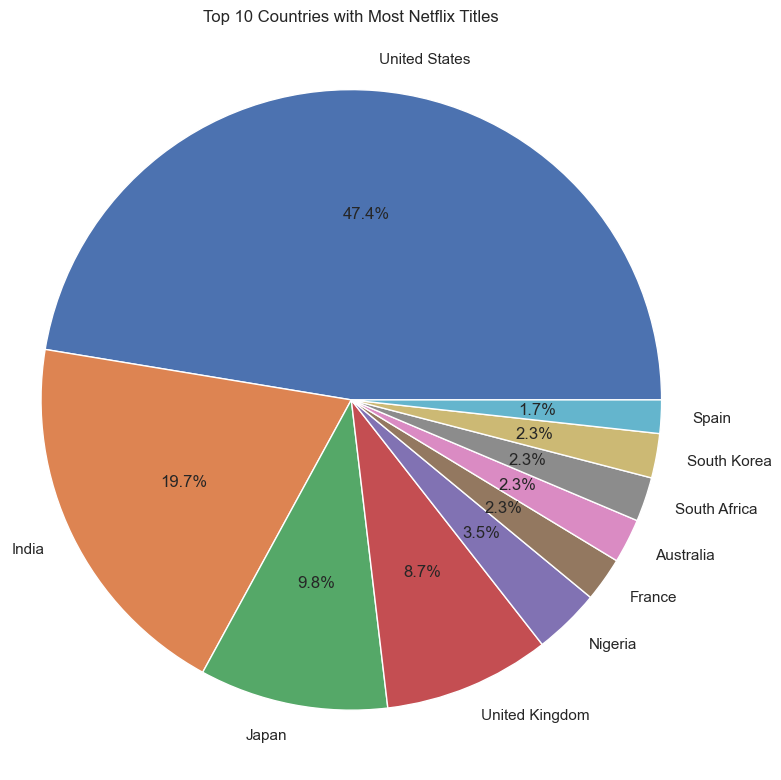

In [26]:
# Clean and drop nulls in 'country' and 'type'
df = df.dropna(subset=['country', 'type'])
# Count the number of Movies/TV Shows by country
country_counts = df['country'].value_counts()
# Drop 'Unknown' if it exists
if 'Unknown' in country_counts.index:
    country_counts = country_counts.drop('Unknown')
# Take top 10 countries after dropping 'Unknown'
country_counts = country_counts.head(10)
# Prepare Data
labels = country_counts.index
sizes = country_counts.values
# Increase pie chart size
plt.figure(figsize=(8, 8))  # Width x Height in inches
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.axis('equal')  # Equal aspect ratio for circle
plt.tight_layout()
plt.show()